# Data Wrangling

## Gather

Gather three different file using three different methods:
- An on hand .csv
- A .tsv from the internet using the requests library
- Construct a .txt file with one tweet's json information for each line using tweet ids from the .csv file and the twitter api tool, tweepy

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import requests
import os
import json
import tweepy
from timeit import default_timer as timer
import matplotlib.pyplot as plt
% matplotlib inline

#### File on hand (.csv)

In [2]:
# Read an on hand csv file named 'twitter-archive-enhanced.csv' into a pandas dataframe
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Download a .tsv file programmatically from the web

In [3]:
# Use the requests library to download 'image-predictions.tsv' from a url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
r

<Response [200]>

In [4]:
# Write the response object 'r' to a file called 'image_predictions.tsv'
with open("image_predictions.tsv", "wb") as file:
    file.write(r.content)

In [5]:
# Read 'image_predictions.tsv' into a new dataframe
df2 = pd.read_csv('image_predictions.tsv', sep = None, engine = 'python')
df2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


#### Use an API to scrape tweet information from the web to a .txt file

In [7]:
# Create twitter API using tweepy

consumer_key = '?'
consumer_secret = '?'
access_token = '?'
access_secret = '?'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True)

In [ ]:
# Use tweepy api to get statuses from ids and write to a line of .txt file
start = timer()

with open('tweet_json.txt', 'w') as file:
    for id in df['tweet_id']:
        try:
            tweet = json.dumps(api.get_status(id, tweet_mode = 'extended')._json)
            file.write(tweet + '\n')
            print(id)
        except:
            continue

end = timer()
time_elapsed = timer() - start
time_elapsed

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448


In [6]:
# Read the tweet_json.txt file and append tweet id, retweet_count, and favorite_count to three lists (ids, retweets, favorites)
ids = []
retweets = []
favorites = []

with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        ids.append(data['id'])
        retweets.append(data['retweet_count'])
        favorites.append(data['favorite_count'])

In [7]:
# Create a new dataframe from a dictionary with the desired column names as the keys
columns = ['tweet_id', 'retweet_count', 'favorite_count']
new_dict = {'tweet_id': ids,
            'retweet_count': retweets, 
            'favorite_count': favorites}
df3 = pd.DataFrame.from_records(new_dict, columns = columns)
df3.tail()

,tweet_id,retweet_count,favorite_count
2340,666049248165822465,41,109
2341,666044226329800704,141,299
2342,666033412701032449,45,125
2343,666029285002620928,47,129
2344,666020888022790149,518,2555


## Assess

Assess visually and programmatically for quality and tidiness issues. Include a list of the issues at the end of the assessment.

#### Visual Assessment

In [9]:
# Display df for visual assessment
df

# Rating is represented in two columns; missing data in many columns; many names in the 'name' columns are 'None' or 'a';
# dog stages are all 'None'

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
# Display df2 for visual assessment
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [57]:
# Display df3 for visual inspection
df3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8580,38769
1,892177421306343426,6304,33207
2,891815181378084864,4187,25007
3,891689557279858688,8696,42144
4,891327558926688256,9465,40304
5,891087950875897856,3132,20204
6,890971913173991426,2086,11844
7,890729181411237888,19019,65472
8,890609185150312448,4290,27765
9,890240255349198849,7463,31924


#### Programmatic Assessment

Build on intuition gleaned from visual assessment using code to dig deeper and clarify issues.

In [9]:
# Check data types and missing values using .info()
df.info()

# in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, 
# retweeted_status_timestamp are mostly empty columns; expanded urls is missing some entries; timestamp wrong data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# Check to see if ratings' five stat summaries indicate any problems
df.describe()
# Rating numerator has a very high amount of variance and a max of 1776, which is a huge jump compared to 
# the jumps from the first to third quartile; the denominator is also a bit off since I thought the ratings were out of 10
# and the max here is 170 and the min is 0. Yeah, 0 in the denominator.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
# Take a closer look at the values found under the 'rating_denominator' column
df.rating_denominator.value_counts()
# a lot of not 10 denominators

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
# Set the maximum dispay width to -1 to view the full text of tweets with denominators not equal to ten
pd.set_option('display.max_colwidth', -1)

# Display the tweet_ids and text of tweets with non-ten denominators
denom_df = df.loc[df['rating_denominator'] != 10]
denom_df.loc[:, ['tweet_id', 'text']]
# many of these incorrectly assumed common fraction expressions like 7/11 (store), 9/11(day that will live on in infamy), 
# or 24/7 (all day, every day), etc. from the body were ratings. Others are not ratings at all. Most just have multiple dogs and
# rate them all at once out of 10 * (# of dogs). I don't mind this last point since I'll normalize the ratings later. There is
# also one correction for another item in the list. Note tweet_ids and their problems in the 'Assess' markdown cell.

,tweet_id,text
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
342,832088576586297345,@docmisterio account started on 11/15/15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…"
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq


In [13]:
# Let's take a closer list at the names of the dogs
df.name.value_counts()
# 745 dogs have 'None', 55 have 'a', 8 have 'the', 7 have 'an' as the name. Since this column had no missing values, 'None' must
# be a string and thus it doesn't fit the schema of strings that contain names. The other non-name words also don't fit the
# schema and they all could go after 'This is', which is probably how the regular expression used tried to pick up names.

None         745
a            55 
Charlie      12 
Oliver       11 
Cooper       11 
Lucy         11 
Penny        10 
Lola         10 
Tucker       10 
Winston      9  
Bo           9  
the          8  
Sadie        8  
an           7  
Daisy        7  
Buddy        7  
Toby         7  
Bailey       7  
Jax          6  
Milo         6  
Scout        6  
Stanley      6  
Dave         6  
Bella        6  
Leo          6  
Jack         6  
Koda         6  
Rusty        6  
Oscar        6  
Gus          5  
            ..  
Aqua         1  
Miley        1  
Strudel      1  
Lenox        1  
Furzey       1  
Teddy        1  
Ulysses      1  
Amélie       1  
Gordon       1  
Chase        1  
Stewie       1  
Anthony      1  
Brooks       1  
Kuyu         1  
Sora         1  
Kevon        1  
Maya         1  
Kaia         1  
Crimson      1  
Monster      1  
Banditt      1  
Eazy         1  
Jimbo        1  
Tove         1  
Carll        1  
Mo           1  
Sully        1  
Tilly        1

In [14]:
# It looks like we have a lot of not names in the dataset. We'd have to look at the full text of these tweets either manually 
# or maybe with a better regular expression (it seems it might have just been the word after 'is' or 'this is') in order to 
# get names for these ratings.
lowercase_names = []
for name in df.name:
    if name.islower() and name not in lowercase_names:
        lowercase_names.append(name)
print(len(lowercase_names), lowercase_names)

25 ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [15]:
# I'm sort of confused on the dog stage concept. Are there doggos who are also floofers, puppers, or puppos?
multi_stage = []
for id in df[df.doggo == 'doggo'][df.floofer == 'floofer']['tweet_id']:
    multi_stage.append(id)
for id in df[df.doggo == 'doggo'][df.pupper == 'pupper']['tweet_id']:
    multi_stage.append(id)
for id in df[df.doggo == 'doggo'][df.puppo == 'puppo']['tweet_id']:
    multi_stage.append(id)
    
multi_stage

# After looking at the tweets, I found that all of these multi-stage dog ratings are actually for multiple dogs or simply
# reference another dog stage or concept. There are no multi-stage dogs. This means that the doggo, pupper, puppo, and floofer 
# variable are actually coding for one variable, stage.

C:\Users\solar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\solar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\solar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


[854010172552949760,
 817777686764523521,
 808106460588765185,
 802265048156610565,
 801115127852503040,
 785639753186217984,
 781308096455073793,
 775898661951791106,
 770093767776997377,
 759793422261743616,
 751583847268179968,
 741067306818797568,
 733109485275860992,
 855851453814013952]

In [16]:
# A lot of the values under the dog stage columns are 'None', too. Use .value_counts() to get an idea for how many are missing
df.puppo.value_counts(), df.doggo.value_counts(), df.pupper.value_counts(), df.floofer.value_counts()

# We don't have information for dog stage for most dogs because these stages aren't in most tweets. We'd have to have visual 
# coders go through the images or create a neural network that can predict dog stage to get this information. 

(None     2326
 puppo    30  
 Name: puppo, dtype: int64, None     2259
 doggo    97  
 Name: doggo, dtype: int64, None      2099
 pupper    257 
 Name: pupper, dtype: int64, None       2346
 floofer    10  
 Name: floofer, dtype: int64)

In [17]:
# Use .info() to check for missing values and data types in the next dataframe
df2.info()
# No missing values. Data types are correct.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
# In addition to a table a about tweet information, we could imagine a second table about images (tweets can have up to 4)
print(len(df2), df2.nunique())
# However, the data doesn't have information for each image, only which image had the strongest prediction for each tweet, for
# reference purposes. Since dog rating tweets are the sole observational unit, df2 can be merged with the main df. It looks like
# there are duplicate 'jpg_url' values, though. Each rating is supposed to be for a different dog so let's investigate further.

2075 tweet_id    2075
jpg_url     2009
img_num     4   
p1          378 
p1_conf     2006
p1_dog      2   
p2          405 
p2_conf     2004
p2_dog      2   
p3          408 
p3_conf     2006
p3_dog      2   
dtype: int64


In [19]:
# Compare duplicate tweets using .duplicated showing all duplicates and sorted by 'jpg_url'
jpg_dups = df2[df2.duplicated(subset = 'jpg_url', keep = False)].sort_values(by = 'jpg_url', axis = 0)

# Grab the duplicate tweet_ids
dup_ids = []
for line in jpg_dups.tweet_id:
    dup_ids.append(line)

# Display the text of duplicated tweets from df2 for investigation.
df[df.tweet_id.isin(dup_ids)].loc[:, ['tweet_id', 'text']]

# A lot of these are actually retweets, which makes them duplicates.

,tweet_id,text
19,888202515573088257,RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX
23,887473957103951883,This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX
36,885311592912609280,RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5
95,873697596434513921,RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF
123,868880397819494401,This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF
155,861769973181624320,"RT @dog_rates: ""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9"
211,851953902622658560,RT @dog_rates: This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao
260,842892208864923648,RT @dog_rates: This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
266,841833993020538882,RT @dog_rates: This is Ken. His cheeks are magic. 13/10 (IG: ken_shiba) https://t.co/btzf1zTDeQ
341,832215726631055365,RT @dog_rates: This is Moreton. He's the Good Boy Who Lived. 13/10 magical as h*ck https://t.co/rLHGx3VAF3


In [20]:
df3.info()
# more information about the dog rating tweets. df3 can also be merged with the main df. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


The following issues were identified during assessment.

### Quality Issues
1. 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' missing most values
2. 'timestamp' has the wrong data types
3. 'expanded_url' is missing some urls
4. The 'name' columns contains words like 'a' as values
5. Dog breed name capitilization on prediction table columns p1, p2, and p3 is inconsistent
6. Actually correction of previous rating: 684225744407494656; original to be dropped: 684222868335505415
7. inaccurate ratings: 666287406224695296 (actual 9/10), 682962037429899265 (10/10), 716439118184652801 (11/10), 722974582966214656 (13/10), 740373189193256964 (14/10)
8. not ratings: 810984652412424192 (no rating), 835246439529840640 (no rating, no picture), 682808988178739200 (not a rating), 686035780142297088 (no rating), 832088576586297345 (not a rating)
9. retweeted duplicates share the same jpeg image as original tweet

### Tidiness Issues
1. Rating split into two columns
2. Dog rating tweet information on three tables instead of one

## Clean

Define a plan for cleaning the data and develop the code to accomplish the plan. Test your work by assessing the clean dataframe.

#### Define
- Drop columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'doggo', 'pupper', 'puppo', 'floofer', and 'expanded_url'
- Combine 3 dataframes
- Make 'timestamp' column into datetime type
- Replace all 'a', 'an', 'the', or 'just' names with None
- Make all dog breed names all lower case on columns p1, p2 p3
- Drop jpg_img duplicates and all tweets starting with 'RT'
- Drop tweet ids 684222868335505415 (corrected in another rating), 810984652412424192 (no rating), 835246439529840640 (no rating, no picture), 682808988178739200 (not a rating), 686035780142297088 (no rating), 832088576586297345 (not a rating)
- Fix ratings for tweet ids 666287406224695296 (actual 9/10), 682962037429899265 (10/10), 716439118184652801 (11/10), 722974582966214656 (13/10), 740373189193256964 (14/10)
- Normalize dog ratings by dividing the numerators and denominators then multiplying by 10, drop 'rating_numerator' and 'rating_denominator'

#### Code

In [77]:
# Make a copy before making changes to dataframe
df_clean = df.copy()

- Drop columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'doggo', 'pupper', 'puppo', 'floofer', and 'expanded_url'

In [78]:
# Make a list of columns then pass the list to .drop()
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
           'retweeted_status_timestamp', 'doggo', 'puppo', 'floofer', 'pupper']
df_clean.drop(columns = columns, inplace = True)

In [79]:
# Since expanded_urls are uniquely identified by tweet_id, it's the same thing in two columns.
# Rather than recalculating expanded_urls, let's drop them.
df_clean.drop(columns = ['expanded_urls'], inplace = True)

- Combine 3 dataframes

In [80]:
# Merge dfs
df_clean = pd.merge(df_clean, df3, on = 'tweet_id')
df_clean = pd.merge(df_clean, df2, on = 'tweet_id')
df_clean = df_clean.reset_index(drop = True)

- Make 'timestamp' column into datetime type

In [81]:
df_clean.timestamp = pd.to_datetime(df_clean.timestamp, infer_datetime_format = True)

- Replace all 'a', 'an', 'the', or 'just' names with None

In [111]:
# Change all instances of names in the list lowercase_names to 'None'
for word in lowercase_names:
    df_clean.loc[df_clean['name'] == word, 'name'] = 'None'

# and all 'None' into None
df_clean.loc[df_clean['name'] == "None", 'name'] = None

In [109]:
lowercase_names

['such',
 'a',
 'quite',
 'one',
 'incredibly',
 'very',
 'my',
 'not',
 'his',
 'an',
 'just',
 'getting',
 'this',
 'unacceptable',
 'all',
 'infuriating',
 'the',
 'actually',
 'by',
 'officially',
 'light',
 'space']

- Make all dog breed names all lower case on columns p1, p2 p3

In [83]:
df_clean.p1 = df_clean.p1.str.lower()
df_clean.p2 = df_clean.p1.str.lower()
df_clean.p3 = df_clean.p1.str.lower()

- Drop jpg_img duplicates and all tweets starting with 'RT'

In [84]:
# Create a list of tweet_ids for all observations whose text contains 'RT'
ids = []
for line in df_clean[df_clean.text.str.contains('RT @')].tweet_id:
    ids.append(line)
    
print(len(ids))

# Assign df_clean to a subset where the tweet id does not equal any id in list
for id in ids:
    df_clean = df_clean.loc[df_clean['tweet_id'] != id]
    
# Drop rows with duplicate 'jpg_img'
df_clean.drop_duplicates(subset = 'jpg_url', inplace = True)

75


- Drop tweet ids 684222868335505415 (corrected in another rating), 810984652412424192 (no rating), 835246439529840640 (no rating, no picture), 682808988178739200 (not a rating), 686035780142297088 (no rating), 832088576586297345 (not a rating)

In [85]:
# Create a list of tweet ids to drop
ids = [684222868335505415, 810984652412424192, 835246439529840640, 
       682808988178739200, 686035780142297088, 832088576586297345]

# Assign df_clean to a subset of df_clean where the tweet id does not equal any id in the list
for id in ids:
    df_clean = df_clean.loc[df_clean['tweet_id'] != id]

- Fix ratings for tweet ids 666287406224695296 (actual 9/10), 682962037429899265 (10/10), 716439118184652801 (11/10), 722974582966214656 (13/10), 740373189193256964 (14/10)

In [86]:
# Make a list of ids, a list of desired numerators, and a counter variable
ids = [666287406224695296, 682962037429899265, 716439118184652801, 722974582966214656, 740373189193256964]
numerators = [9, 10, 11, 13, 14]
count = 0

# Change the numerator for each id to be a numerator from the numerators list indexed by the counter variable, add one to counter
for id in ids:
    df_clean.loc[df_clean['tweet_id'] == id, 'rating_numerator'] = numerators[count]
    df_clean.loc[df_clean['tweet_id']==id, 'rating_denominator'] = 10
    count += 1 

C:\Users\solar\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


- Normalize dog ratings by dividing the numerators and denominators then multiplying by 10, drop 'rating_numerator' and 'rating_denominator'

In [87]:
# Convert the final product to integer type
df_clean['rating'] = ((df_clean.rating_numerator / df_clean.rating_denominator)*10).astype(int)
df_clean = df_clean.drop(columns = ['rating_numerator', 'rating_denominator'])

In [88]:
# Finally, reset the index for the cleaned dataframe
df_clean.reset_index(drop = True, inplace=True)

#### Test

In [114]:
# Let's take a look at the new dataframe
df_clean.head()

,tweet_id,timestamp,source,text,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,8580,38769,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,orange,0.085851,False,orange,0.076110,False,13
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,6304,33207,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,chihuahua,0.090647,True,chihuahua,0.068957,True,13
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,4187,25007,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,chihuahua,0.078253,True,chihuahua,0.031379,True,12
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,8696,42144,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,paper_towel,0.168086,True,paper_towel,0.040836,False,13
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,9465,40304,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,basset,0.225770,True,basset,0.175219,True,12


- Drop columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'doggo', 'pupper', 'puppo', 'floofer', and 'expanded_url'
- Combine 3 dataframes
- Make 'timestamp' column into datetime type

In [113]:
df_clean.info()
# We now have combined dataframe without unwanted columns. 'timestamp' data type is datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 19 columns):
tweet_id          1992 non-null int64
timestamp         1992 non-null datetime64[ns]
source            1992 non-null object
text              1992 non-null object
name              1349 non-null object
retweet_count     1992 non-null int64
favorite_count    1992 non-null int64
jpg_url           1992 non-null object
img_num           1992 non-null int64
p1                1992 non-null object
p1_conf           1992 non-null float64
p1_dog            1992 non-null bool
p2                1992 non-null object
p2_conf           1992 non-null float64
p2_dog            1992 non-null bool
p3                1992 non-null object
p3_conf           1992 non-null float64
p3_dog            1992 non-null bool
rating            1992 non-null int32
dtypes: bool(3), datetime64[ns](1), float64(3), int32(1), int64(4), object(7)
memory usage: 247.1+ KB


- Replace all 'a', 'an', 'the', or 'just' names with None

In [112]:
lowercase_names = []
for name in df_clean.name:
    try:
        if name.islower() and name not in lowercase_names:
            lowercase_names.append(name)
    except:
        continue
print(len(lowercase_names), lowercase_names)

# There are now zero lowercase words in the 'name' column

0 []


- Make all dog breed names all lower case on columns p1, p2 p3

In [92]:
sum(df_clean.p1.str.isupper())
# All dog breeds and items are now lowercase

0

- Drop jpg_img duplicates and all tweets starting with 'RT'

In [93]:
sum(df_clean.duplicated(subset = 'jpg_url'))
# There are no duplicated jpegs

0

In [115]:
sum(df_clean.text.str.contains('RT @'))
# There are no retweets

0

- Drop tweet ids 684222868335505415 (corrected in another rating), 810984652412424192 (no rating), 835246439529840640 (no rating, no picture), 682808988178739200 (not a rating), 686035780142297088 (no rating), 832088576586297345 (not a rating)

In [95]:
ids = [684222868335505415, 810984652412424192, 835246439529840640, 
       682808988178739200, 686035780142297088, 832088576586297345]
sum(df_clean.tweet_id.isin(ids))
# The specified tweets were successfully dropped

0

- Fix ratings for tweet ids 666287406224695296 (actual 9/10), 682962037429899265 (10/10), 716439118184652801 (11/10), 722974582966214656 (13/10), 740373189193256964 (14/10)
- Normalize dog ratings by dividing the numerators and denominators then multiplying by 10, drop 'rating_numerator' and 'rating_denominator'

In [116]:
ids = [666287406224695296, 682962037429899265, 716439118184652801,
       722974582966214656, 740373189193256964]
df_clean.rating.loc[df_clean.tweet_id.isin(ids)]
# The ratings have been corrected and the normalized rating column is working as expected

799     14
890     13
924     11
1326    10
1971    9 
Name: rating, dtype: int32

In [117]:
# Save df_clean as a csv called 'twitter_archive_master.csv'
df_clean.to_csv('twitter_archive_master.csv', index = False)

# Analysis and Visualization

#### Insight 1

In [118]:
# Ratings above 14 tend to be for special events and depart from the usual scale, so let's query a dataframe with ratings
# 14 or lower
normal_rating = df_clean.query('rating <= 14')

In [119]:
# Let's create a new variable based on whether or not a rating is clearly named
normal_rating['is_named'] = (normal_rating.name.isna() == False)
normal_rating.head()

C:\Users\solar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,tweet_id,timestamp,source,text,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,is_named
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,8580,38769,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,orange,0.085851,False,orange,0.076110,False,13,True
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,6304,33207,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,chihuahua,0.090647,True,chihuahua,0.068957,True,13,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,4187,25007,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,chihuahua,0.078253,True,chihuahua,0.031379,True,12,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,8696,42144,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,paper_towel,0.168086,True,paper_towel,0.040836,False,13,True
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,9465,40304,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,basset,0.225770,True,basset,0.175219,True,12,True


In [120]:
# Display the average 'rating', 'retweet_count', and 'favorite_count' for named and unnamed dogs
normal_rating.groupby('is_named').mean()[['rating', 'retweet_count', 'favorite_count']]

# Dog ratings with named dogs had a higher average favorite count than ratings with unnamed dogs

,rating,retweet_count,favorite_count
is_named,,,
False,10.232449,2764.75507,7858.861154
True,10.707281,2685.98737,9305.504458


Insight: Dog ratings with named dogs had a higher average favorite count than ratings with unnnamed dogs.

#### Insight 2

In [121]:
# Let's take a look at the top five dog names in terms of 'rating', 'retweet_count', and 'favorite_count'
normal_rating.groupby('name').mean()['rating'].sort_values(ascending = False).head()

name
General     14.0
Emmy        14.0
Kuyu        14.0
Clifford    14.0
Iggy        14.0
Name: rating, dtype: float64

In [122]:
normal_rating.groupby('name').mean()['retweet_count'].sort_values(ascending = False).head()

name
Stephan    61024.0
Duddles    44567.0
Jamesy     36393.0
Hurley     20647.0
Aja        19345.0
Name: retweet_count, dtype: float64

In [123]:
normal_rating.groupby('name').mean()['favorite_count'].sort_values(ascending = False).head()
# Dogs named Jamesy, Stephan, Duddles, and Aja drove the most engagement on average in the dataset, appearing on the top five 
# for retweet_count and favorite_count

name
Jamesy     124316.0
Stephan    122909.0
Duddles    105878.0
Aja        79895.0 
Lilly      71919.0 
Name: favorite_count, dtype: float64

Insight: Dogs named Jamesy, Stephan, Duddles, and Aja drove the most engagement on average in the dataset, appearing in the top five names for retweet_count and favorite_count

#### Insight 3

In [124]:
# Create subset of normal_rating where the strongest prediction was a dog breed
dog_prediction = normal_rating.query('p1_dog == True')
dog_prediction.head()

,tweet_id,timestamp,source,text,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,is_named
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,6304,33207,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,chihuahua,0.090647,True,chihuahua,0.068957,True,13,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,4187,25007,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,chihuahua,0.078253,True,chihuahua,0.031379,True,12,True
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,9465,40304,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,basset,0.225770,True,basset,0.175219,True,12,True
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None,3132,20204,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,0.425595,True,chesapeake_bay_retriever,0.116317,True,chesapeake_bay_retriever,0.076902,False,13,False
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,Jax,2086,11844,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,0.341703,True,appenzeller,0.199287,True,appenzeller,0.193548,False,13,True


In [125]:
# Let's see which dogs had the highest ratings and retweet and favorite counts
dog_prediction.groupby('p1').mean()['rating'].sort_values(ascending = False).head()

p1
saluki             12.500000
briard             12.333333
tibetan_mastiff    12.250000
border_terrier     12.142857
silky_terrier      12.000000
Name: rating, dtype: float64

In [126]:
dog_prediction.groupby('p1').mean()['retweet_count'].sort_values(ascending = False).head()

p1
standard_poodle     6439.571429
english_springer    5807.222222
afghan_hound        5785.333333
saluki              4975.250000
french_bulldog      4706.153846
Name: retweet_count, dtype: float64

In [127]:
dog_prediction.groupby('p1').mean()['favorite_count'].sort_values(ascending = False).head()
# dogs predicted to be salukis are a clear favorite on We Rate Dogs, receiving the highest average rating and favorite count
# as well as appearing in the top five for highest retweet count.

p1
saluki                     23620.750000
french_bulldog             18314.923077
afghan_hound               16914.000000
black-and-tan_coonhound    16656.500000
flat-coated_retriever      16453.500000
Name: favorite_count, dtype: float64

Insight: Ratings of dogs predicted to be salukis recieved the highest average rating and average favorite count as well as appearing in the top five predicted breeds for retweet counts. Predicted salukis are clearly a favorite at We Rate Dogs.

#### Visualization

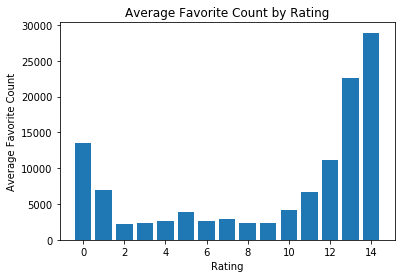

In [128]:
# Plot the average 'favorite_count' for each unique 'rating' to see if there are any apparent relationships between
# the two variables. To do this, aggregate using .groupby()
favorite_by_rating = normal_rating.groupby('rating').mean()['favorite_count']

plt.bar(favorite_by_rating.index, favorite_by_rating)
plt.xlabel('Rating')
plt.ylabel('Average Favorite Count')
plt.title('Average Favorite Count by Rating')
plt.savefig('wrangle_viz.png', bbox_inches='tight');

# Dog ratings with ratings below 2 or above 10 are favorited more times on average than those with ratings from 3 to 10. 
# Ratings over 12 have the highest average favorite counts. Those are definitely good dogs, Brent.